<a href="https://colab.research.google.com/github/quanndm/kltn/blob/dev/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Init - import library - download data

In [1]:
### Delete dataset exists
import os

folder_path = "./LITS17"
os.system(f"rm -rf {folder_path}")

0

In [2]:
!rm -rf kltn
!rm -rf sample_data
!git clone -b dev https://github.com/quanndm/kltn.git

Cloning into 'kltn'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 157 (delta 74), reused 111 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (157/157), 356.98 KiB | 5.25 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [3]:
from kltn.init.install_dependencies import install_packages
install_packages("./kltn")


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

from kltn import *
from kltn.datasets.get_datasets import get_datasets_lits
from kltn.utils.logger import init_logger

In [5]:
drive.flush_and_unmount()
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
log_path = "/content/drive/MyDrive/KLTN/logs"
LOGGER = init_logger(log_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
from kltn.datasets.prepare_data import prepare_dataset_LiTS
prepare_dataset_LiTS()

0.33% complete (down: 0.0 kB/s up: 0.0 kB/s peers: 1) downloading LITS17 (https://academictorrents.com/announce.php)[127.0.0.1:6881] v1 skipping tracker announce (unreachable) "" (1)
LITS17 (https://ipv6.academictorrents.com/announce.php)[127.0.0.1:6881] v1 skipping tracker announce (unreachable) "" (1)
LITS17 (https://academictorrents.com/announce.php)[172.28.0.12:6881] v1 unspecified system error "" (1)
LITS17 (https://ipv6.academictorrents.com/announce.php)[172.28.0.12:6881] v1 unspecified system error "" (1)
LITS17 (udp://tracker.opentrackr.org:1337/announce)[127.0.0.1:6881] v1 skipping tracker announce (unreachable) "" (1)
6.57% complete (down: 63768.5 kB/s up: 1728.1 kB/s peers: 8) downloading LITS17 (https://academictorrents.com/announce.php)[127.0.0.1:6881] v1 skipping tracker announce (unreachable) "" (2)
LITS17 (https://ipv6.academictorrents.com/announce.php)[127.0.0.1:6881] v1 skipping tracker announce (unreachable) "" (2)
LITS17 (https://ipv6.academictorrents.com/announce.p

## Load data

In [8]:
source_folder = "/content/LITS17"
full_train_dataset, val_dataset = get_datasets_lits(source_folder=source_folder, seed=123, fold_number=2)
print(len(full_train_dataset), len(val_dataset))

105 26


In [9]:
train_loader = torch.utils.data.DataLoader(full_train_dataset, batch_size=1, shuffle=True,
                                           num_workers=1, pin_memory=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False,
                                         pin_memory=True, num_workers=1)

print("Train dataset number of batch:", len(train_loader))
print("Val dataset number of batch:", len(val_loader))

Train dataset number of batch: 105
Val dataset number of batch: 26


In [10]:
for batch in train_loader:
    # Assuming your input data is a 4D tensor (batch_size, channels, height, width)
    data_shape = batch['image'].shape
    label_shape = batch['label'].shape
    print("Data shape in the first batch:", data_shape)
    print("Label shape in the first batch:", label_shape)
    break  # Print only the first batch

Data shape in the first batch: torch.Size([1, 1, 128, 128, 128])
Label shape in the first batch: torch.Size([1, 2, 128, 128, 128])


## Visual data

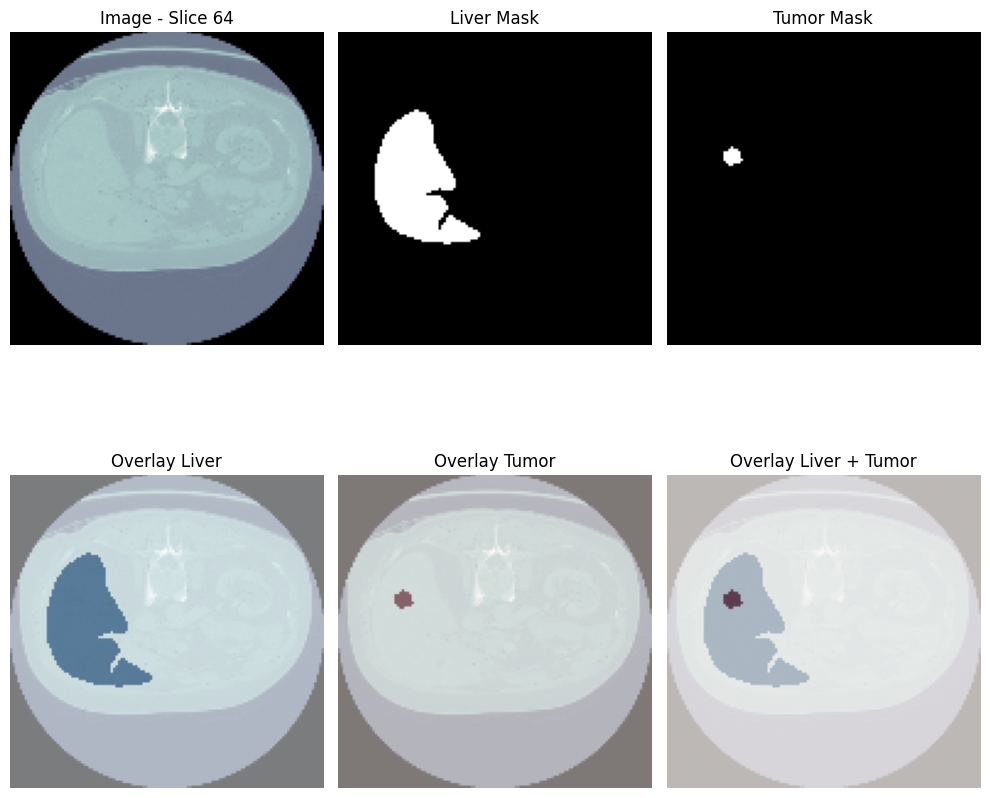

In [11]:
import matplotlib.pyplot as plt

for batch in train_loader:
    image_sample = batch['image']
    label_sample = batch['label']  # Label có 2 lớp: Liver và Tumor

    slice_idx = image_sample.shape[2] // 2  # Lấy lát cắt giữa theo trục Depth (D)

    img_slice = image_sample[0, 0, slice_idx, :, :].numpy()  # Ảnh gốc (CT Scan)
    liver_label = label_sample[0, 0, slice_idx, :, :].numpy()  # Mask gan (Liver)
    tumor_label = label_sample[0, 1, slice_idx, :, :].numpy()  # Mask khối u (Tumor)

    fig, axes = plt.subplots(2, 3, figsize=(10, 10))  # Chia thành 2 hàng, 3 cột

    # Hàng 1: Ảnh gốc + Liver Mask + Tumor Mask
    axes[0, 0].imshow(img_slice, cmap=plt.cm.bone)
    axes[0, 0].set_title(f"Image - Slice {slice_idx}")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(liver_label, cmap="gray")
    axes[0, 1].set_title(f"Liver Mask")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(tumor_label, cmap="gray")
    axes[0, 2].set_title(f"Tumor Mask")
    axes[0, 2].axis("off")

    # Hàng 2: Overlay Liver + Overlay Tumor + Overlay cả 2
    axes[1, 0].imshow(img_slice, cmap=plt.cm.bone)
    axes[1, 0].imshow(liver_label, cmap="Blues", alpha=0.5)  # Liver màu xanh
    axes[1, 0].set_title(f"Overlay Liver")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(img_slice, cmap=plt.cm.bone)
    axes[1, 1].imshow(tumor_label, cmap="Reds", alpha=0.5)  # Tumor màu đỏ
    axes[1, 1].set_title(f"Overlay Tumor")
    axes[1, 1].axis("off")

    axes[1, 2].imshow(img_slice, cmap=plt.cm.bone)
    axes[1, 2].imshow(liver_label, cmap="Blues", alpha=0.5)
    axes[1, 2].imshow(tumor_label, cmap="Reds", alpha=0.5)
    axes[1, 2].set_title(f"Overlay Liver + Tumor")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()
    break  # Chỉ hiển thị batch đầu tiên
